In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
quora=pd.read_csv("train.csv")

In [3]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


## EDA

In [4]:
quora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


- There are 2 null entries in the question2 column we have to remove them
- There is 1 null entry in question1 column

There are multiple ways to check for null entries in the dataset
- check the datatype
- use syntax df.isnull.any(axis=1)

for index,row in quora.iterrows():
    if(type(row["qid1"] or row["qid2"]) is str):
        continue
    else:
        print(index)
        #print(row)

In [5]:
quora[quora.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


So question numbers {174364,493340} are null questions. we can further try to find if these entries are given null by mistake or is there is any question for these id's at all

In [6]:
print(quora[quora["qid2"]==493340])
print(quora[quora["qid1"]==174364])
print(quora[quora["qid1"]==493340])
print(quora[quora["qid2"]==174364])

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []
Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []
            id    qid1    qid2 question1  \
363362  363362  493340  493341       NaN   

                                                question2  is_duplicate  
363362  My Chinese name is Haichao Yu. What English na...             0  
            id    qid1    qid2                         question1 question2  \
105780  105780  174363  174364    How can I develop android app?       NaN   
201841  201841  303951  174364  How can I create an Android app?       NaN   

        is_duplicate  
105780             0  
201841             0  


There are no questions given at all for these id's so it is better to remove them

## Basic Statistics

In [7]:
print("Number of 0's and 1's in the dataset: \n"+ str(quora.groupby("is_duplicate")["id"].count()))

Number of 0's and 1's in the dataset: 
is_duplicate
0    255027
1    149263
Name: id, dtype: int64


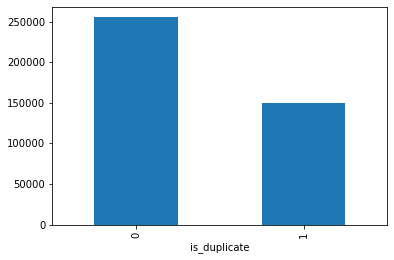

In [8]:
quora.groupby("is_duplicate")["id"].count().plot.bar()

In [9]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(quora['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(quora['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


- mean of "is_duplicate" column will give percentage of 1's in the column

In [10]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### Distribution of questions

In [11]:
qtotal=pd.Series(quora["qid1"].tolist()+quora["qid2"].tolist())
#qtotal=np.array(total)
uni_qid=qtotal.unique()
q_morethan_oneTime=np.sum(qtotal.value_counts()>1)

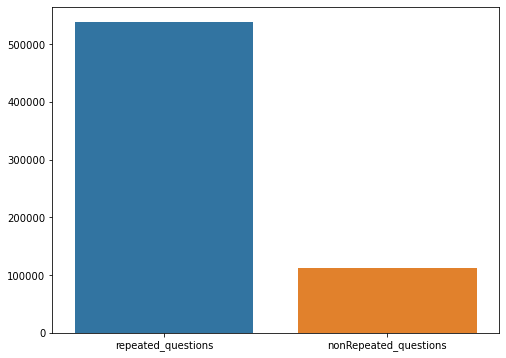

In [12]:
x=["repeated_questions","nonRepeated_questions"]
y=[len(uni_qid),q_morethan_oneTime]
plt.figure(figsize=(8,6))
sns.barplot(x,y)
plt.show()

### Plotting Number of occurence of each question

Text(0, 0.5, 'no of questions')

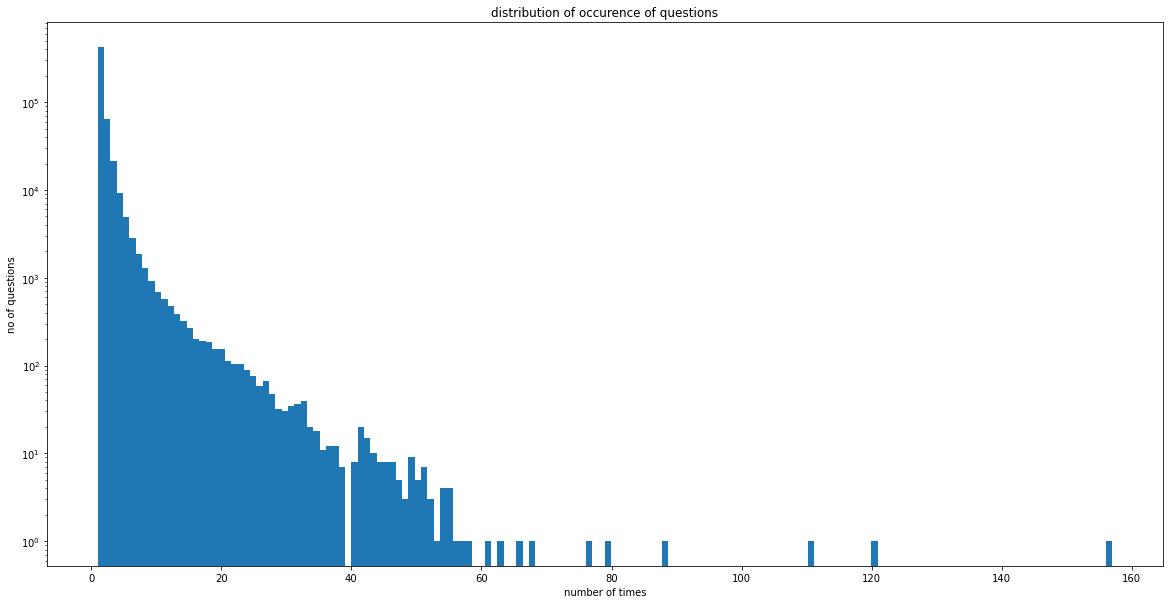

In [13]:
plt.figure(figsize=(20,10))
plt.hist(qtotal.value_counts(),bins=160)
plt.yscale('log',nonposy="clip")
plt.title("distribution of occurence of questions")
plt.xlabel("number of times")
plt.ylabel("no of questions")

In [14]:
quora=quora.fillna(" ") ## Filling the null entries with empty space

### Feature Engineering 

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [15]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [16]:
import os

In [17]:
def words_common(row):
    #set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w1=set(map(lambda word:word.lower().strip(),row["question1"].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row["question2"].split(" ")))
    return 1.0*len(w1&w2)

In [18]:
def word_total(row):
    w1=set(map(lambda word:word.lower().strip(),row["question1"].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row["question2"].split(" ")))
    return 1.0*(len(w1)+len(w2))

In [19]:
def word_share(row):
    w1=set(map(lambda word:word.lower().strip(),row["question1"].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row["question2"].split(" ")))
    return 1.0*(len(w1&w2)/(len(w1)+len(w2)))

In [20]:
if os.path.isfile('quora_extractedfeatures.csv'):
    df = pd.read_csv("quora_extractedfeatures.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    quora["freq_qid1"]=quora.groupby('qid1')['qid1'].transform('count')
    quora["freq_qid2"]=quora.groupby('qid2')['qid2'].transform('count')
    quora['qlen1']=quora['question1'].str.len()
    quora['qlen2']=quora['question2'].str.len()
    quora['q1_words']=quora['question1'].apply(lambda row:len(row.split(" ")))
    quora['q2_words']=quora['question2'].apply(lambda row:len(row.split(" ")))
    quora["words_common"]=quora.apply(words_common,axis=1)
    quora["word_total"]=quora.apply(word_total,axis=1)
    quora["words_share"]=quora.apply(word_share,axis=1)
    quora.to_csv("quora_extractedfeatures.csv",index=False)

In [21]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


## <font color='darkblue'>Text Preprocessing<font>

In [22]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [23]:
import sys
print(sys.executable)

C:\Users\ranad\anaconda3\envs\titan\python.exe


In [24]:
!jupyter kernelspec list

Available kernels:
  python3    C:\Users\ranad\anaconda3\envs\titan\share\jupyter\kernels\python3


In [25]:
!python --version

Python 3.8.3


In [26]:
from fuzzywuzzy import fuzz

## Some more Features

In [27]:
stopwords_wordcloud={'com', 'of', 'once', 'between', 'own', 'http', "you'll", "they'll", 'by', 'it', 'they', "wasn't", 'which', 
 'very', 'or', "she'll", 'not', 'the', 'but', 'been', 'further', "he's", 'there', 'an', 'other', 'so', "we'll", "when's", 
 "couldn't", 'k', 'yourselves', "didn't", 'each', 'having', 'because', 'out', 'therefore', "who's", 'else', 'themselves', 
 "what's", 'could', "he'll", 'such', "i'm", 'a', "it's", 'should', 'few', 'them', 'under', 'why', 'shall', "wouldn't", 'nor',
 'our', "isn't", 'and', 'were', "let's", "won't", "can't", 'during', "hadn't", "they're", 'ever', 'me', 'whom', 'myself', 'how',
 'are', 'would', 'his', 'at', 'against', 'r', 'while', 'has', "mustn't", 'below', 'its', 'like', 'we', 'you', 'have', "she's",
 "they'd", 'again', 'same', 'from', 'any', 'does', 'only', 'these', 'your', "here's", 'both', 'too', 'her', 'however', 'www', 
 "i'd", 'yours', 'as', 'through', 'herself', 'than', "we'd", 'until', 'was', 'itself', 'what', 'am', 'that', "i've", 'if', 
 "doesn't", "why's", 'ourselves', 'when', 'with', 'himself', 'some', 'most', 'this', 'hers', 'in', 'more', "we've", "haven't", 
 'doing', 'into', 'she', "aren't", 'just', 'since', 'yourself', 'here', 'can', 'down', "hasn't", 'over', 'is', "shouldn't",
 'off', 'did', 'get', "there's", "we're", 'being', 'i', 'for', 'otherwise', "she'd", 'cannot', 'he', 'no', 'all', 'him',
 'where', "that's", "you're", 'after', 'their', 'also', 'my', "they've", 'on', 'ought', "don't", "how's", 'hence', "weren't", 
 "where's", 'those', 'who', "you've","shan't", 'theirs', 'before', 'to', 'above', "he'd", 'then', "i'll", 'up', "you'd", 'had', 'be', 'ours', 'do', 'about'}

In [28]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [29]:
q1=quora.iloc[0,3]
q2=quora.iloc[0,4]

In [30]:
q1_words=q1.split(" ")
q2_words=q2.split(" ")
common_words=set(q1_words)&set(q2_words)

In [31]:
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import distance

SAFE_DIV = 0.0001 
STOP_WORDS = stopwords.words("english")
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
        
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()    
    return x

In [32]:
import sys
sys.path

['D:\\Computer Science\\Machine-Learning\\Quora question pair similarity',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan\\python38.zip',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan\\DLLs',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan\\lib',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan',
 '',
 'C:\\Users\\ranad\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan\\lib\\site-packages',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan\\lib\\site-packages\\win32',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\ranad\\anaconda3\\envs\\titan\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\ranad\\.ipython']

In [33]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))

    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)
    print("token features...")
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)  
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
    print("fuzzy features..")
    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [34]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [35]:
def features(q1,q2):
    q1_words=set(q1.split(" "))-set(stopwords)
    q2_words=set(q2.split(" "))-set(stopwords)
    common_words=q1_words&q2_words
    cwc_min=len(common_words)/min(len(q1_words),len(q2_words))
    cwc_max=len(common_words)/max(len(q1_words),len(q2_words))
    #csc_max=len()
    q1_stopwords=[word for word in q1_words if word in stopwords]
    q2_stopwords=[word for word in q2_words if word in stopwords]
    cwc
    return cwc_min

df=extract_features(quora)

In [36]:
if os.path.isfile('quora_morefeatures.csv'):
    df = pd.read_csv("quora_morefeatures.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    df=extract_features(quora)
    df.to_csv("quora_morefeatures.csv",index=False)
    

In [37]:
fuzz.ratio("dfskhjdsfjhafsdjhg","dfshdfsajkshfdahjk")

61

In [68]:
quora_tsne.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [85]:
quora_tsne=df[0:5000]
quora_tsneX=quora_tsne[["cwc_min","cwc_max","csc_min","csc_max","ctc_max","ctc_min","last_word_eq","first_word_eq","abs_len_diff","mean_len","token_set_ratio","token_sort_ratio","fuzz_ratio","fuzz_partial_ratio","longest_substr_ratio"]]
quora_tsneY=quora_tsne[["is_duplicate"]]
X=MinMaxScaler().fit_transform(quora_tsneX)
y=quora_tsneY

In [92]:
model = TSNE(n_components=2, random_state=0)
modeltsne=model.fit_transform(X)

In [94]:
modeltsne.shape

(5000, 2)

In [40]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [41]:
?WordCloud

In [42]:
import sys
sys.executable

'C:\\Users\\ranad\\anaconda3\\envs\\titan\\python.exe'

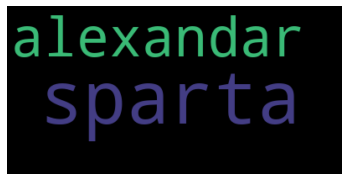

In [65]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### T-SNE

In [ ]:
from scikit.manifold import tsne